# Project #3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading in Dataset

https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [2]:
data = pd.read_csv("/content/household_power_consumption.txt", delimiter=';')

data.head()

/tmp/ipython-input-3942547242.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/household_power_consumption.txt", delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data['Sub_metering_3'].isnull().value_counts()

data = data.fillna(0)

## Aggregating Data

In [4]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)
data = data.set_index('Datetime')
# Drop non-numeric columns before summing
daily_data = data.drop(columns=['Date', 'Time']).apply(pd.to_numeric, errors='coerce').resample('D').sum()
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [5]:
# Convert all columns to numeric, coercing errors
data_numeric_hourly = data.apply(pd.to_numeric, errors='coerce')
# Drop the original 'Date' and 'Time' columns after creating the index
data_numeric_hourly = data_numeric_hourly.drop(columns=['Date', 'Time'], errors='ignore')
# Resample and sum by hour
hourly_data = data_numeric_hourly.resample('H').sum()
hourly_data.head()

/tmp/ipython-input-2811759675.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = data_numeric_hourly.resample('H').sum()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


## Exploratory Data Analysis

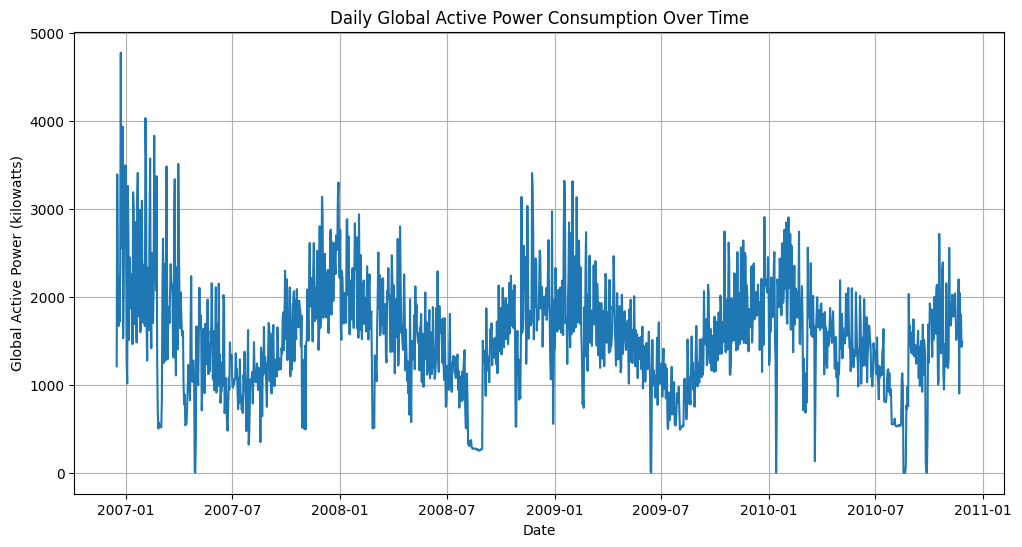

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Global_active_power'])
plt.title('Daily Global Active Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

In [7]:
daily_data['Day_of_Week'] = daily_data.index.day_name()
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
Datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,Saturday
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,Sunday
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,Monday
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,Tuesday
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,Wednesday


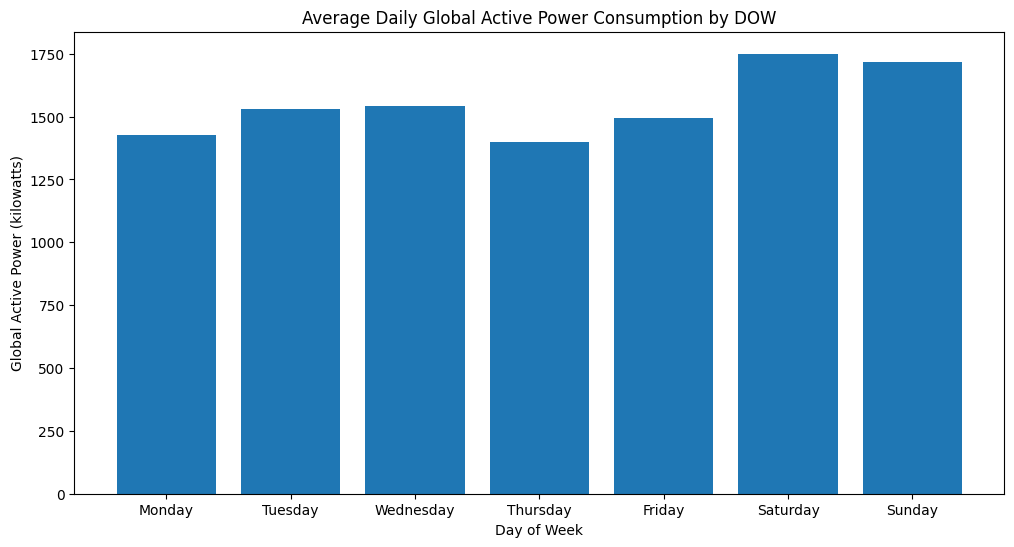

In [9]:
dow_data = daily_data.groupby('Day_of_Week').mean()

# Define the desired order of the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day_of_Week' index to a categorical type with the specified order
dow_data.index = pd.Categorical(dow_data.index, categories=weekday_order, ordered=True)

# Sort the DataFrame by the ordered categorical index
dow_data = dow_data.sort_index()

plt.figure(figsize=(12, 6))
plt.bar(dow_data.index, dow_data['Global_active_power'])
plt.title('Average Daily Global Active Power Consumption by DOW')
plt.xlabel('Day of Week')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

## Creating Data Splits

In [14]:
train = hourly_data.loc[:'2008-12-31']
val = hourly_data.loc['2009-01-01':'2009-12-31']
test = hourly_data.loc['2010-01-01':]

print(train.shape)
print(val.shape)
print(test.shape)

(17911, 7)
(8760, 7)
(7918, 7)


## Creating Baseline Model

### Naïve (last-observed)

In [15]:
y_true = val['Global_active_power']

# Convert the columns to numeric, coercing errors to NaN, and then fill NaN values
y_true = pd.to_numeric(y_true, errors='coerce').fillna(0)
y_pred_naive = pd.to_numeric(val['Global_active_power'].shift(1), errors='coerce').fillna(0)


mae_naive = mean_absolute_error(y_true[1:], y_pred_naive[1:])
mse_naive = mean_squared_error(y_true[1:], y_pred_naive[1:])

print("MAE:", mae_naive)
print("MSE:", mse_naive)

MAE: 25.58582692088138
MSE: 1537.7411022112115


### Historical Average

In [16]:
# Convert the 'Global_active_power' column to numeric, coercing errors to NaN, and then fill NaN values
val_global_active_power_numeric = pd.to_numeric(val['Global_active_power'], errors='coerce').fillna(0)

hist_avg = np.repeat(val_global_active_power_numeric.mean(), len(val_global_active_power_numeric))
mae_hist = mean_absolute_error(val_global_active_power_numeric, hist_avg)
mse_hist = mean_squared_error(val_global_active_power_numeric, hist_avg)

print("MAE:", mae_hist)
print("MSE:", mse_hist)

MAE: 41.426162900221
MSE: 2578.6390026545505


Given that the naïve performed better (as shown by having smaller MAE and MSE), it will be selected as our baseline to model to be compared with the RNN.

## LSTM Model

In [20]:
#helper function to be used to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq_x = data[i:i+sequence_length]
        seq_y = data[i+sequence_length]
        X.append(seq_x)
        y.append(seq_y)
    X = np.array(X).reshape(-1, sequence_length, 1)  # add feature dimension
    y = np.array(y)
    return X, y

In [19]:
#scaling the data to be used
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train[['Global_active_power']])
scaled_val = scaler.transform(val[['Global_active_power']])

In [23]:
#flattening values
train_values = scaled_train.flatten()
val_values = scaled_val.flatten()

lookback = 168  # 1 week of past hours
train_X, train_y = create_sequences(train_values, lookback)
val_X, val_y = create_sequences(val_values, lookback)

print(train_X.shape, train_y.shape)  # (num_samples, 168, 1)
print(val_X.shape, val_y.shape)  # (num_samples,)

(17743, 168, 1) (17743,)
(8592, 168, 1) (8592,)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))  # don't return sequences
model.add(Dense(1))  # predict next hour

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_X, train_y,
    epochs=20,
    batch_size=64,
    verbose=1
)

y_pred = model.predict(val_X)

Epoch 1/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 0.0084
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step - loss: 0.0082
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - loss: 0.0081
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - loss: 0.0083
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - loss: 0.0084
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - loss: 0.0083
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - loss: 0.0083
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.0081
Epoch 9/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 0.0081
Epoch 10/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - loss: 0.0087
Epoch 11/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - loss: 0.0083
Epoch 12/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - loss: 0.0083
Epoch 13/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - loss: 0.0080
Epoch 14/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - loss: 0.0082
Epoch 15/20
278/278 ━━━━━━━━━

In [38]:
mae = mean_absolute_error(val_y, y_pred)
mse = mean_squared_error(val_y, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 0.05983656984491119
MSE: 0.006869375526562456


In order to compare these results to the baseline model's results, I need to inverse transform them to ensure they are on the same scale.

In [41]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_true_inv = scaler.inverse_transform(val_y.reshape(-1, 1))

mae = mean_absolute_error(y_true_inv, y_pred_inv)
mse = mean_squared_error(y_true_inv, y_pred_inv)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 23.553588659360482
MSE: 1064.3833019504211


## Comparing Baseline to LSTM


| Model | MAE| MSE |
|-----------|-----------|-----------|
| Naïve | 25.59 | 1537.74 |
| LSTM  | 23.55 | 1064.38 |

The LSTm model outperformed the baseline model in both MAE and MSE, so we will move forward using it on our test set.

## Performing LSTM Model on Test set

In [42]:
scaled_test = scaler.transform(test[['Global_active_power']])

test_values = scaled_test.flatten()

test_X, test_y = create_sequences(test_values, lookback)

y_pred = model.predict(test_X)

mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

243/243 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
MAE: 0.05804973336115523
MSE: 0.006326656456284368


In [43]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_true_inv = scaler.inverse_transform(test_y.reshape(-1, 1))

mae = mean_absolute_error(y_true_inv, y_pred_inv)
mse = mean_squared_error(y_true_inv, y_pred_inv)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 22.85023263137056
MSE: 980.2910676360825


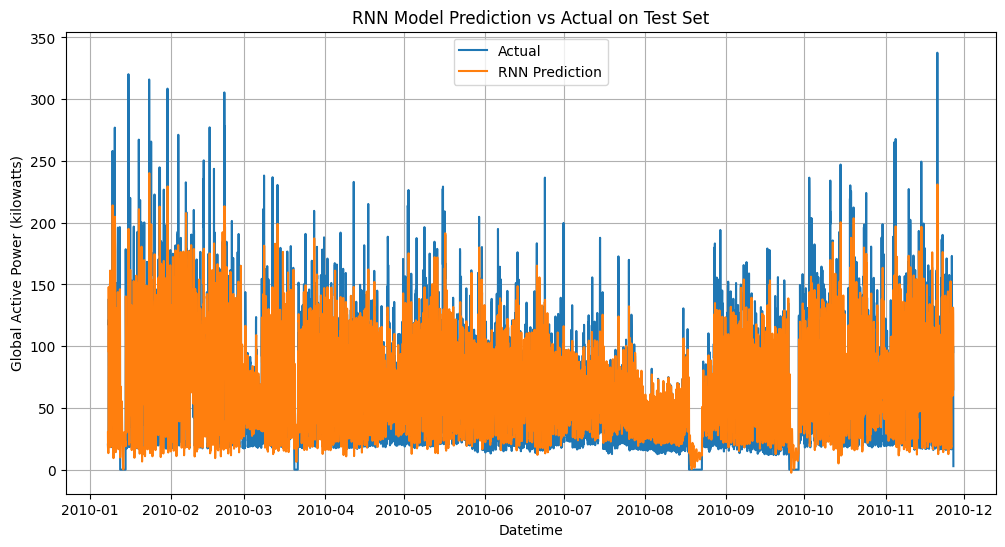

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(test.index[lookback:], y_true_inv, label='Actual')
plt.plot(test.index[lookback:], y_pred_inv, label='RNN Prediction')
plt.title('RNN Model Prediction vs Actual on Test Set')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.show()

## Producing Error Heatmap

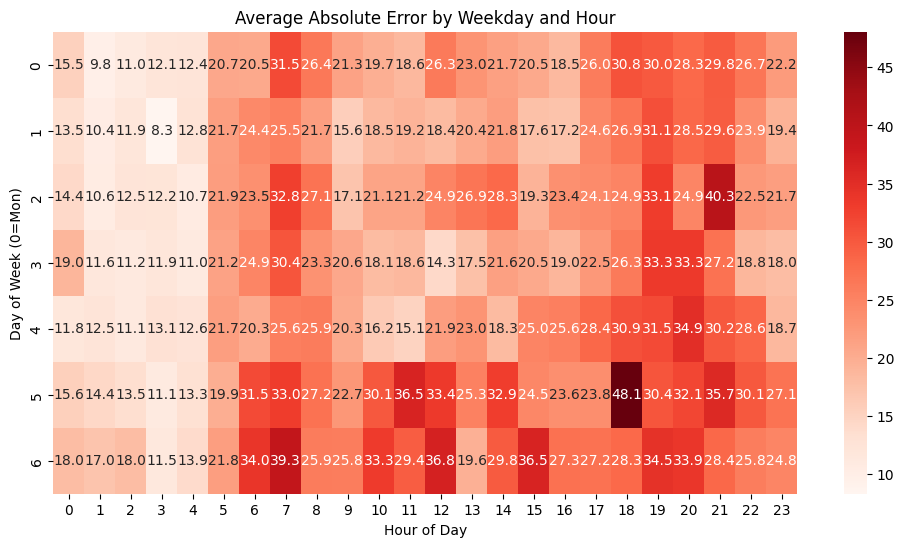

In [48]:
errors = np.abs(y_true_inv - y_pred_inv).flatten()

# Make a DataFrame with errors and timestamps
error_df = pd.DataFrame({
    'error': errors,
}, index=test.index[lookback:])  # make sure to align with y_pred

# Extract hour of day and day of week
error_df['hour'] = error_df.index.hour
error_df['weekday'] = error_df.index.dayofweek  # 0=Monday, 6=Sunday

# Pivot table: average error by weekday and hour
error_pivot = error_df.pivot_table(index='weekday', columns='hour', values='error', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(error_pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title("Average Absolute Error by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon)")
plt.show()